Importing required libraries and loading the dataset.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as mpp
import warnings
warnings.filterwarnings("ignore")

data = pd. read_csv(r'dataset.csv')
org_data = data.copy()
data.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


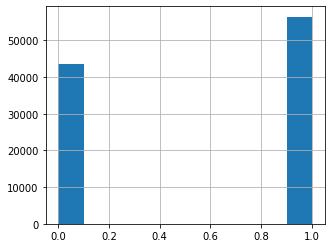

In [12]:
data['Sentiment'].hist(figsize=(5,4))
mpp.show() 

The dataset in balanced roughly, hence no class balancing techniques like SMOTE, undersampling, oversampling or resampling are required. Authentic data can be used for model training and since it won't make it biased due to class imbalance.

For each tweet text, we start preprocessing by converting the text into lower case, removing @mentions, hyperlinks and punctuations.

In [14]:
import re

def dpp(row):
    row = row.lower()
    row = re.sub("@[A-Za-z0-9]+","",row)
    row = re.sub("_[A-Za-z0-9]+","",row)     #to remove usernames with underscore in between
    row = re.sub('http\S+|www.\S+', '',row)
    return row

data['SentimentText'] = data['SentimentText'].apply(dpp)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my apl frie...
1,2,0,i missed the new moon trail...
2,3,1,omg its already 7:30 :o
3,4,0,.. omgaga. im sooo im gunna cry. i'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
6,7,1,juuuuuuuuuuuuuuuuussssst chillin!!
7,8,0,sunny again work tomorrow :-| ...
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)


Now that all mentions and hyperlinks are removed, in the next step we will remove the punctutations.

In [15]:
data['SentimentText'] = data['SentimentText'].str.replace("[^a-zA-Z#]", " ")
data.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my apl frie...
1,2,0,i missed the new moon trail...
2,3,1,omg its already o
3,4,0,omgaga im sooo im gunna cry i ...
4,5,0,i think mi bf is cheating on me ...
5,6,0,or i just worry too much
6,7,1,juuuuuuuuuuuuuuuuussssst chillin
7,8,0,sunny again work tomorrow ...
8,9,1,handed in my uniform today i miss you ...
9,10,1,hmmmm i wonder how she my number


In [ ]:
Next we will remove the stop words like a, the, oh which have little to no importance in determining the tweet sentiment.

As the column SentimentText contains a continuous sentence, for applying the algorithm and performing analysis, we need to split the text into a list of tokens.

In [32]:
from nltk.tokenize import word_tokenize

data['TokenText']=data['SentimentText'].apply(word_tokenize)

In [39]:
X = data[['ItemID','TokenText']] #relevant columns
y = data['Sentiment'] #target class

In [40]:
#splitting into training and validation dataset
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [41]:
print(X_train.shape) #checking if splitted prpoerly
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(79991, 2)
(19998, 2)
(79991,)
(19998,)


In [ ]:
#y_pred = xgb.predict(X_valid)

#from sklearn.metrics import classification_report
#print(classification_report(y_valid, y_pred))